<a href="https://colab.research.google.com/github/Darrenn231/MachineLearning/blob/main/ML_BA05_LAB3_2502001763.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df_raw = pd.read_excel('dataset_CS.xlsx')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15561 entries, 0 to 15560
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Score A  12366 non-null  float64
 1   Score B  15556 non-null  float64
 2   Score C  15560 non-null  float64
 3   Score D  15553 non-null  float64
 4   Score E  15558 non-null  float64
 5   Score F  15556 non-null  float64
 6   Score G  15559 non-null  float64
 7   Score H  15561 non-null  float64
 8   Target   15561 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.1 MB


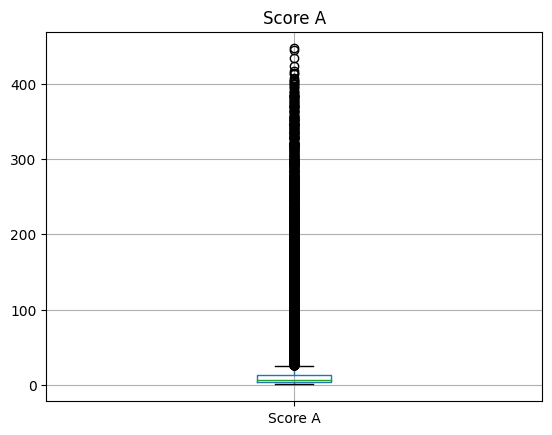

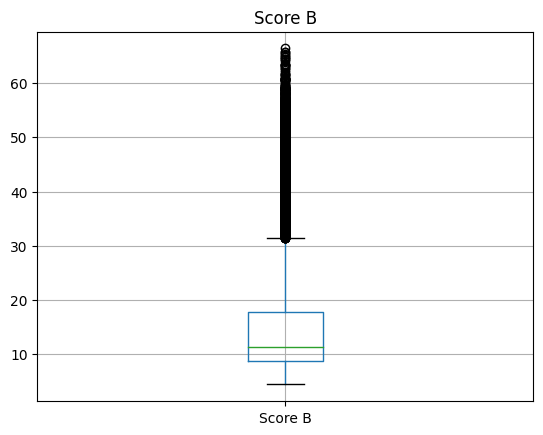

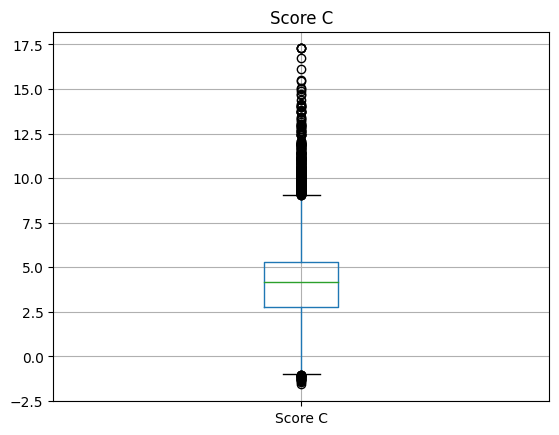

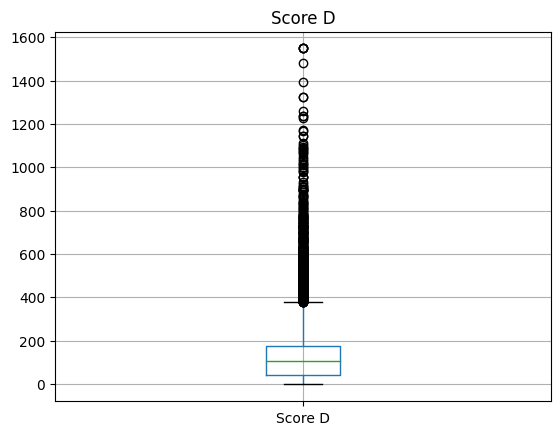

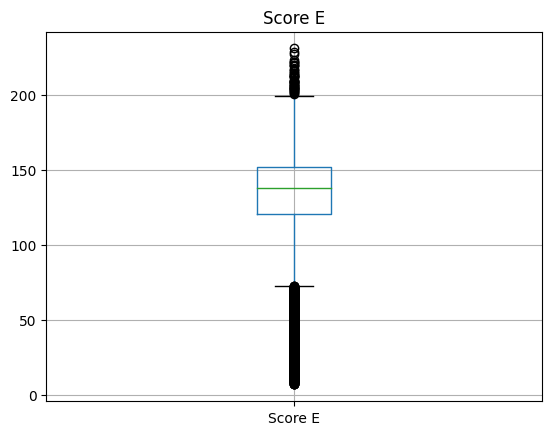

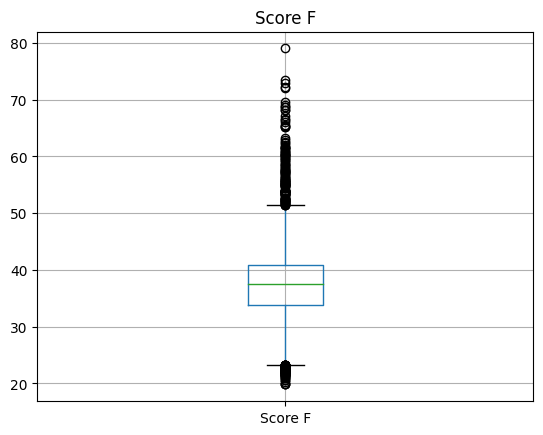

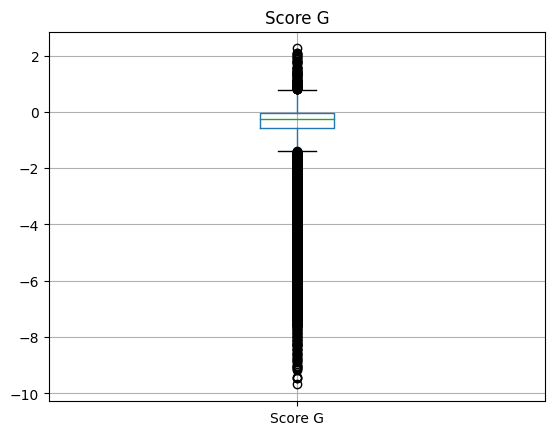

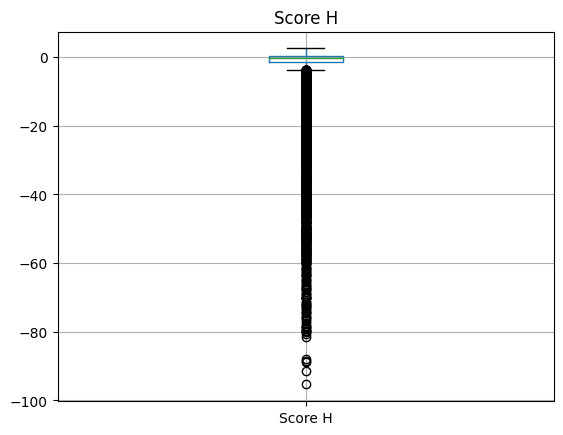

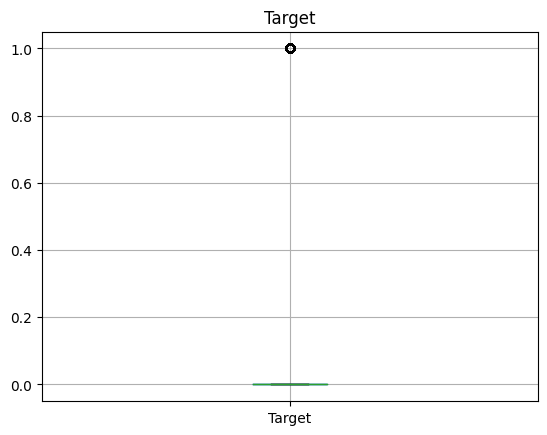

In [ ]:
labels = ['Score A', 'Score B', 'Score C', 'Score D', 'Score E', 'Score F', 'Score G', 'Score H', 'Target']

for i in (labels):
  df_raw[[i]].boxplot()
  plt.title(i)
  plt.show()

In [ ]:
#missing data
df_raw.isnull().sum()

Score A    3195
Score B       5
Score C       1
Score D       8
Score E       3
Score F       5
Score G       2
Score H       0
Target        0
dtype: int64

In [ ]:
df_cleaned = df_raw.dropna()
df_cleaned.isnull().sum()

Score A    0
Score B    0
Score C    0
Score D    0
Score E    0
Score F    0
Score G    0
Score H    0
Target     0
dtype: int64

In [ ]:
#separate data

#import

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_cleaned.drop('Target', axis = 1),
                                                    df_cleaned['Target'],
                                                    test_size = 0.3,
                                                    random_state = 99)


In [ ]:
print(y_train.shape)

(8646,)


In [ ]:
#import
from sklearn.svm import SVC

#SVM model
model = SVC()
model.fit(x_train, y_train)
predictions = model.predict(x_train)

In [ ]:
from sklearn.metrics import classification_report

pred_y_test = model.predict(x_test)
svc_cr = classification_report(y_test, pred_y_test)
print(svc_cr)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3264
           1       0.92      0.80      0.86       442

    accuracy                           0.97      3706
   macro avg       0.95      0.89      0.92      3706
weighted avg       0.97      0.97      0.97      3706



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C' : [0.1, 1, 10, 100],
              'gamma' : [0.001, 0.01, 0.1, 1, 10],
              'kernel': ['rbf']}


grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10],
                         'kernel': ['rbf']},
             verbose=1)

In [ ]:
  print(grid.best_params_)
  print(grid.best_estimator_)

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=10, gamma=0.001)


In [ ]:
  from sklearn.linear_model import LogisticRegression

  log_reg = LogisticRegression()
  log_reg.fit(x_train, y_train)
  predictions = log_reg.predict(x_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
  pred_y_test = log_reg.predict(x_test)
  log_reg_cr = classification_report(y_test, pred_y_test)
  print(log_reg_cr)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3264
           1       0.95      0.87      0.91       442

    accuracy                           0.98      3706
   macro avg       0.97      0.93      0.95      3706
weighted avg       0.98      0.98      0.98      3706



In [ ]:
  from sklearn.ensemble import RandomForestClassifier

  random_forest = RandomForestClassifier()
  random_forest.fit(x_train, y_train)
  predictions = random_forest.predict(x_train)

In [ ]:
  pred_y_test = random_forest.predict(x_test)
  random_forest_cr = classification_report(y_test, pred_y_test)
  print(random_forest_cr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3264
           1       0.94      0.89      0.92       442

    accuracy                           0.98      3706
   macro avg       0.96      0.94      0.95      3706
weighted avg       0.98      0.98      0.98      3706



In [ ]:
  f1 = [float(i.split()[12]) for i in [svc_cr, log_reg_cr, random_forest_cr]]

<Axes: >

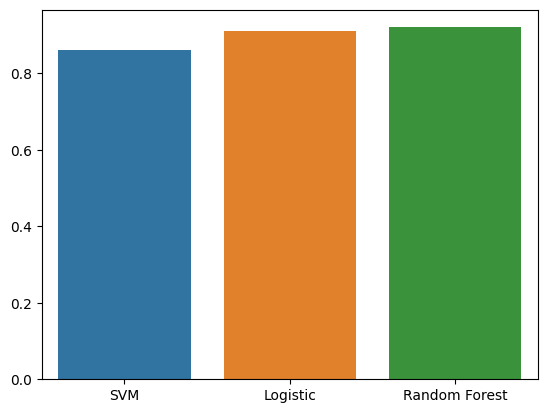

In [ ]:
  sns.barplot(x=['SVM', 'Logistic', 'Random Forest'], y = f1)